In [1]:
import numpy as np

In [2]:
## two loss function: 
## 1. J = 1/2 w * w + c[1/n sum( max(0, 1- y_i * (w x_i + b)) )]
## 2. J = lambda w * w + [1/n sum( max(0, 1- y_i * (w x_i + b)) )]


class SVM:
    def __init__(self, C = 1.0, learning_rate = 0.001, n_iter = 1000):
        self.C = C
        self.lr = learning_rate
        self.n_iter = n_iter
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y < 0, -1 , 1) # y is either -1 or 1
        
        #initial weights 
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iter):
            dw = 0 
            dd = 0 
            for idx, x_i in enumerate(X):
                #x_i shape [num_feature, 1]
                
                ## if 1- y_i * (w x_i + b)) <= 0 , then hinge loss = 0, else hinge loss = yi * (w x_i + b)
                condition = y[idx] * (np.dot(self.w, x_i) + self.b) >= 1
                
                if condition:
                    dw += self.w
                    dd += 0 
                    
                else:
                    dw += self.w + self.C * (-y[idx] * x_i)
                    dd += self.C * (-y[idx])
            
            self.w -= self.lr * dw 
            self.b -= self.lr * dd
        
    
    def predict(self, X):
        
        return np.sign(np.dot(self.w,X.T) + self.b)
        
    

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=200, n_features=2, centers=2, cluster_std=1.05
)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)


clf = SVM(C= 1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))


SVM classification accuracy 1.0


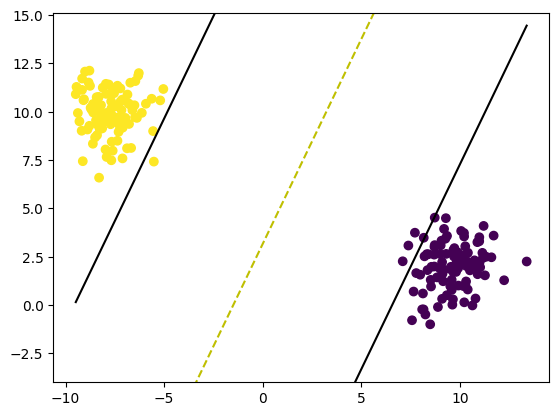

In [4]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()